In [18]:
import  pandas as pd 
import numpy as np
from sklearn.cluster  import KMeans
import matplotlib.pyplot  as plt
from sklearn.preprocessing import scale
from sklearn import cluster
pd.set_option('display.max_columns',None)

In [5]:
# def improt_data(lujing,code):
#     data = pd.read_csv(lujing,encoding =code)
#     return data

In [6]:
# lujing = r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/test/clean_data.csv'
# code = 'utf'
# data = improt_data(lujing,code)

In [19]:
sheet_names = ['Sheet1','Sheet2','Sheet3','Sheet4','Sheet5']
sheet_datas = [pd.read_excel(r'C:/Users/Administrator/Datas/爱尚花语/艾尚花语指标模型/test/sum.xlsx',sheet_name=i) for i in sheet_names]


data = pd.concat(sheet_datas[:-1],axis=0)

In [20]:
data

,开始日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,下单新客人数,入店转化率,下单转化率,推单数,有效订单数,原价交易额,实付交易额,商家补贴金额,商家原因取消订单数,商家拒单数,商家超时未接单数,商家取消不告知用户订单数,缺货导致退款订单数,商家少送错送导致用户退款订单数,商家质量问题导致用户退款订单数,配送原因取消订单数,拣货超时订单数,使用间或完成按钮订单数,平均骑手到店等待时间（min）,平均骑手送货时长（min）,IM会话数,IM回复数,IM回复率,IM1分钟回复数,差评订单数,投诉订单数,平均商家评分,平均商品评分,平均配送评分,平均配送时长（min）,资质类型（仅药品）,资质有效期（仅药品）
0,1,295680,花生活鲜花（鲜花格格花艺生活馆）,鲜花组,四川省,绵阳,否,20150716,在线,24,24.0,6332,84,3,3,1.33,3.57,3,3,578.0,203.00,492.00,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,NaN,NaN
1,1,642989,花生活鲜花（春季花艺）,鲜花组,安徽省,合肥,否,20151223,在线,24,24.0,5822,49,0,0,0.84,0.00,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,NaN,NaN
2,1,653643,花生活鲜花（雅景花艺）,鲜花组,广东省,东莞,否,20190422,在线,10,10.4,3053,36,2,2,1.18,5.56,2,2,553.0,347.00,284.00,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,NaN,NaN
3,1,714142,花生活鲜花（情意浓花店）,鲜花组,浙江省,温州,否,20160129,在线,11,11.6,5653,134,10,9,2.37,7.46,10,9,5441.0,1373.09,4371.91,0,0,0,0,0,0,0,0,0,10,0,0,6,6,100.0,2,0,0,2.4,2.4,1.9,0,NaN,NaN
4,1,720330,浪漫花屋,鲜花组,湖北省,荆州,否,20160130,下线,0,0.0,1,0,0,0,0.00,0.00,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,4,8983876,熹媛,鲜花组,黑龙江省,哈尔滨,否,20200427,在线,7,7.2,520,37,7,7,7.12,18.92,9,8,1791.0,1205.00,898.00,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0.0,0,0,0,2.5,2.5,2.5,0,NaN,NaN
449,4,8983877,花管家鲜花批发,鲜花组,新疆维吾尔自治区,伊犁哈萨克自治州,否,20200428,在线,15,14.9,1799,64,2,2,3.56,3.13,2,2,1106.0,710.00,474.00,0,0,0,0,0,0,0,0,0,2,0,0,3,3,100.0,2,0,0,0.0,0.0,0.0,0,NaN,NaN
450,4,8983878,鹿角花坊,鲜花组,江西省,宜春,否,20200427,在线,13,13.2,1703,57,0,0,3.35,0.00,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,NaN,NaN
451,4,8985806,绿荫花店,鲜花组,贵州省,贵阳,否,20200428,在线,15,14.8,443,12,0,0,2.71,0.00,0,0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,NaN,NaN


In [25]:
def ziduan(data,list_ziduan):
    data = data[list_ziduan]
    return data

In [26]:
list_ziduan = ['开始日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','有效订单数','下单新客人数','入店转化率','下单转化率','原价交易额','实付交易额','商家补贴金额']

In [27]:
data = ziduan(data,list_ziduan)


In [28]:
def zhibiao(a):
    list_ziduan = ['开始日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','有效订单数','下单新客人数','复购人数','入店转化率','下单转化率','新客转化率','复购率','原价交易额','实付交易额','商家补贴金额','原价客单价','实付客单价']
    a = a.reindex(columns=list_ziduan, fill_value=1)
    a['复购人数'] = a['下单人数'] - a['下单新客人数']
    a['新客转化率'] = a['下单新客人数'] / a['下单人数']
    a['复购率'] = a['复购人数'] / a['下单人数']
    a['原价客单价'] = a['原价交易额'] / a['下单人数']
    a['实付客单价'] = a['实付交易额'] / a['下单人数']
    a = a.sort_values(by='曝光人数',ascending=False)
    a = a.fillna(0)
    return a

In [29]:
def kmeans(data,zhibiao):
    x = data[zhibiao]  
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)#促内误差平方和
    print('促内误差平方和：',wcss)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
def kmeans_(data,cluster_x):
    x = cluster_x[0]
    del cluster_x[0]
    data_one = data[cluster_x]
    model=cluster.KMeans(n_clusters=x,random_state=10)
    model.fit(data_one)
    data['cluster']=model.labels_
    return data
    

In [30]:
data = zhibiao(data)
data

,开始日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,有效订单数,下单新客人数,复购人数,入店转化率,下单转化率,新客转化率,复购率,原价交易额,实付交易额,商家补贴金额,原价客单价,实付客单价
181,2,7392788,花生活鲜花（非凡花艺）,鲜花组,江苏省,淮安,否,20190714,在线,24,24.0,76589,1661,49,40,39,10,2.17,2.95,0.795918,0.204082,13908.0,7514.0,7944.0,283.836735,153.346939
28,2,3018522,花生活鲜花（源达花艺）,鲜花组,湖南省,常德,否,20170814,在线,17,17.8,63921,1134,35,31,30,5,1.77,3.09,0.857143,0.142857,8586.0,5139.8,4499.0,245.314286,146.851429
283,2,8197675,蔚然花坊,鲜花组,江苏省,南通,否,20191218,在线,14,14.9,63817,1084,5,2,2,3,1.70,0.46,0.400000,0.600000,1023.0,826.0,197.0,204.600000,165.200000
388,4,8755682,琪琪花店,鲜花组,广东省,佛山,否,20200324,在线,24,24.0,61978,1792,44,34,32,12,2.89,2.46,0.727273,0.272727,8159.0,4326.0,4913.0,185.431818,98.318182
112,2,6773940,花生活鲜花（鲜花婚庆）,鲜花组,山东省,德州,否,20190422,在线,23,23.6,57476,1216,7,6,6,1,2.12,0.58,0.857143,0.142857,1925.0,1135.0,985.0,275.000000,162.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1,7427905,花生活鲜花（KaMan）,鲜花组,上海市,上海,否,20190713,下线,0,0.0,3,0,0,0,0,0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
94,4,6626527,花生活鲜花（博雅鲜花店）,鲜花组,甘肃省,兰州,否,20190310,在线,24,24.0,1,1,1,1,1,0,100.00,100.00,1.000000,0.000000,216.0,154.0,101.0,216.000000,154.000000
93,1,6507601,花生活鲜花（初见花艺馆）,鲜花组,福建省,福州,否,20190117,下线,0,0.0,1,0,0,0,0,0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,1,720330,浪漫花屋,鲜花组,湖北省,荆州,否,20160130,下线,0,0.0,1,0,0,0,0,0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


促内误差平方和： [114240321753.93353, 48208458666.95403, 23748410740.809162, 13493413600.651546, 9051627532.515919, 5931091673.808746, 4331879859.06888, 3373232047.418545, 2786082267.2012477, 2393677699.972878]


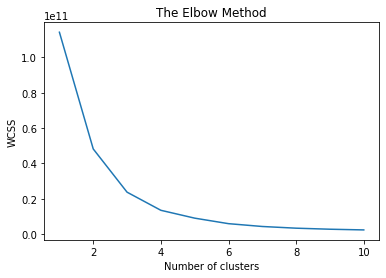

In [31]:
a = ['曝光人数','入店人数','下单人数']
kmeans(data,a)

In [32]:
b = [4,'曝光人数','入店人数','下单人数']
c = kmeans_(data,b)

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\b

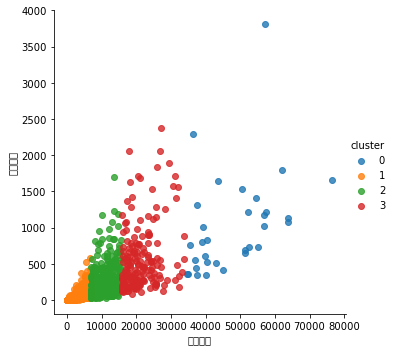

In [33]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x="曝光人数", y="入店人数",data=c,fit_reg=False,hue='cluster')

In [34]:
data.to_csv('clean_data.csv')